In [1]:
#Soubhik Sen
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import osmnx as ox
import networkx as nx
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [2]:
df = pd.read_csv('data/data_stores.csv')
df.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [4]:
city = "New Delhi"
df = df[df["City"] == city][["City", "Street Address", "Latitude", "Longitude"]].reset_index(drop = True)
df.head()

City                                     Street Address  Latitude  \
0  New Delhi  Sangam Courtyard, Major Somnath Marg, Sector 9...     28.57   
1  New Delhi                    Domestic Departure, Terminal 1D     28.56   
2  New Delhi          Ground Floor, Pacific Mall, Subhash Nagar     28.64   
3  New Delhi      1st Floor, Ambience Mall, Nelson Mandela Marg     28.54   
4  New Delhi                Ground Floor, Select City Walk Mall     28.53   

   Longitude  
0      77.17  
1      77.12  
2      77.11  
3      77.16  
4      77.22

In [5]:
df = df.reset_index().rename(columns = {
    "index":"id",
    "Latitude":"y",
    "Longitude":"x"
})
df.head()

id       City                                     Street Address      y  \
0   0  New Delhi  Sangam Courtyard, Major Somnath Marg, Sector 9...  28.57   
1   1  New Delhi                    Domestic Departure, Terminal 1D  28.56   
2   2  New Delhi          Ground Floor, Pacific Mall, Subhash Nagar  28.64   
3   3  New Delhi      1st Floor, Ambience Mall, Nelson Mandela Marg  28.54   
4   4  New Delhi                Ground Floor, Select City Walk Mall  28.53   

       x  
0  77.17  
1  77.12  
2  77.11  
3  77.16  
4  77.22

In [6]:
print(len(df))

16


In [7]:
data = df.copy()
data["color"]=''
data.loc[data['id']==0, 'color'] = 'red'
data.loc[data['id']!=0, 'color'] = 'black'
start = data[data["id"]==0][["y", "x"]].values[0]
print("Starting Point: ", start)
data.head()

Starting Point:  [28.57 77.17]


id       City                                     Street Address      y  \
0   0  New Delhi  Sangam Courtyard, Major Somnath Marg, Sector 9...  28.57   
1   1  New Delhi                    Domestic Departure, Terminal 1D  28.56   
2   2  New Delhi          Ground Floor, Pacific Mall, Subhash Nagar  28.64   
3   3  New Delhi      1st Floor, Ambience Mall, Nelson Mandela Marg  28.54   
4   4  New Delhi                Ground Floor, Select City Walk Mall  28.53   

       x  color  
0  77.17    red  
1  77.12  black  
2  77.11  black  
3  77.16  black  
4  77.22  black

In [8]:
map = folium.Map(location=start, titles="cartodbpositron", zoom_start=12)
data.apply(lambda row:
           folium.CircleMarker(
               location=[row["y"], row["x"]],
               color=row["color"], fill = True, radius=5).add_to(map), axis=1)
map

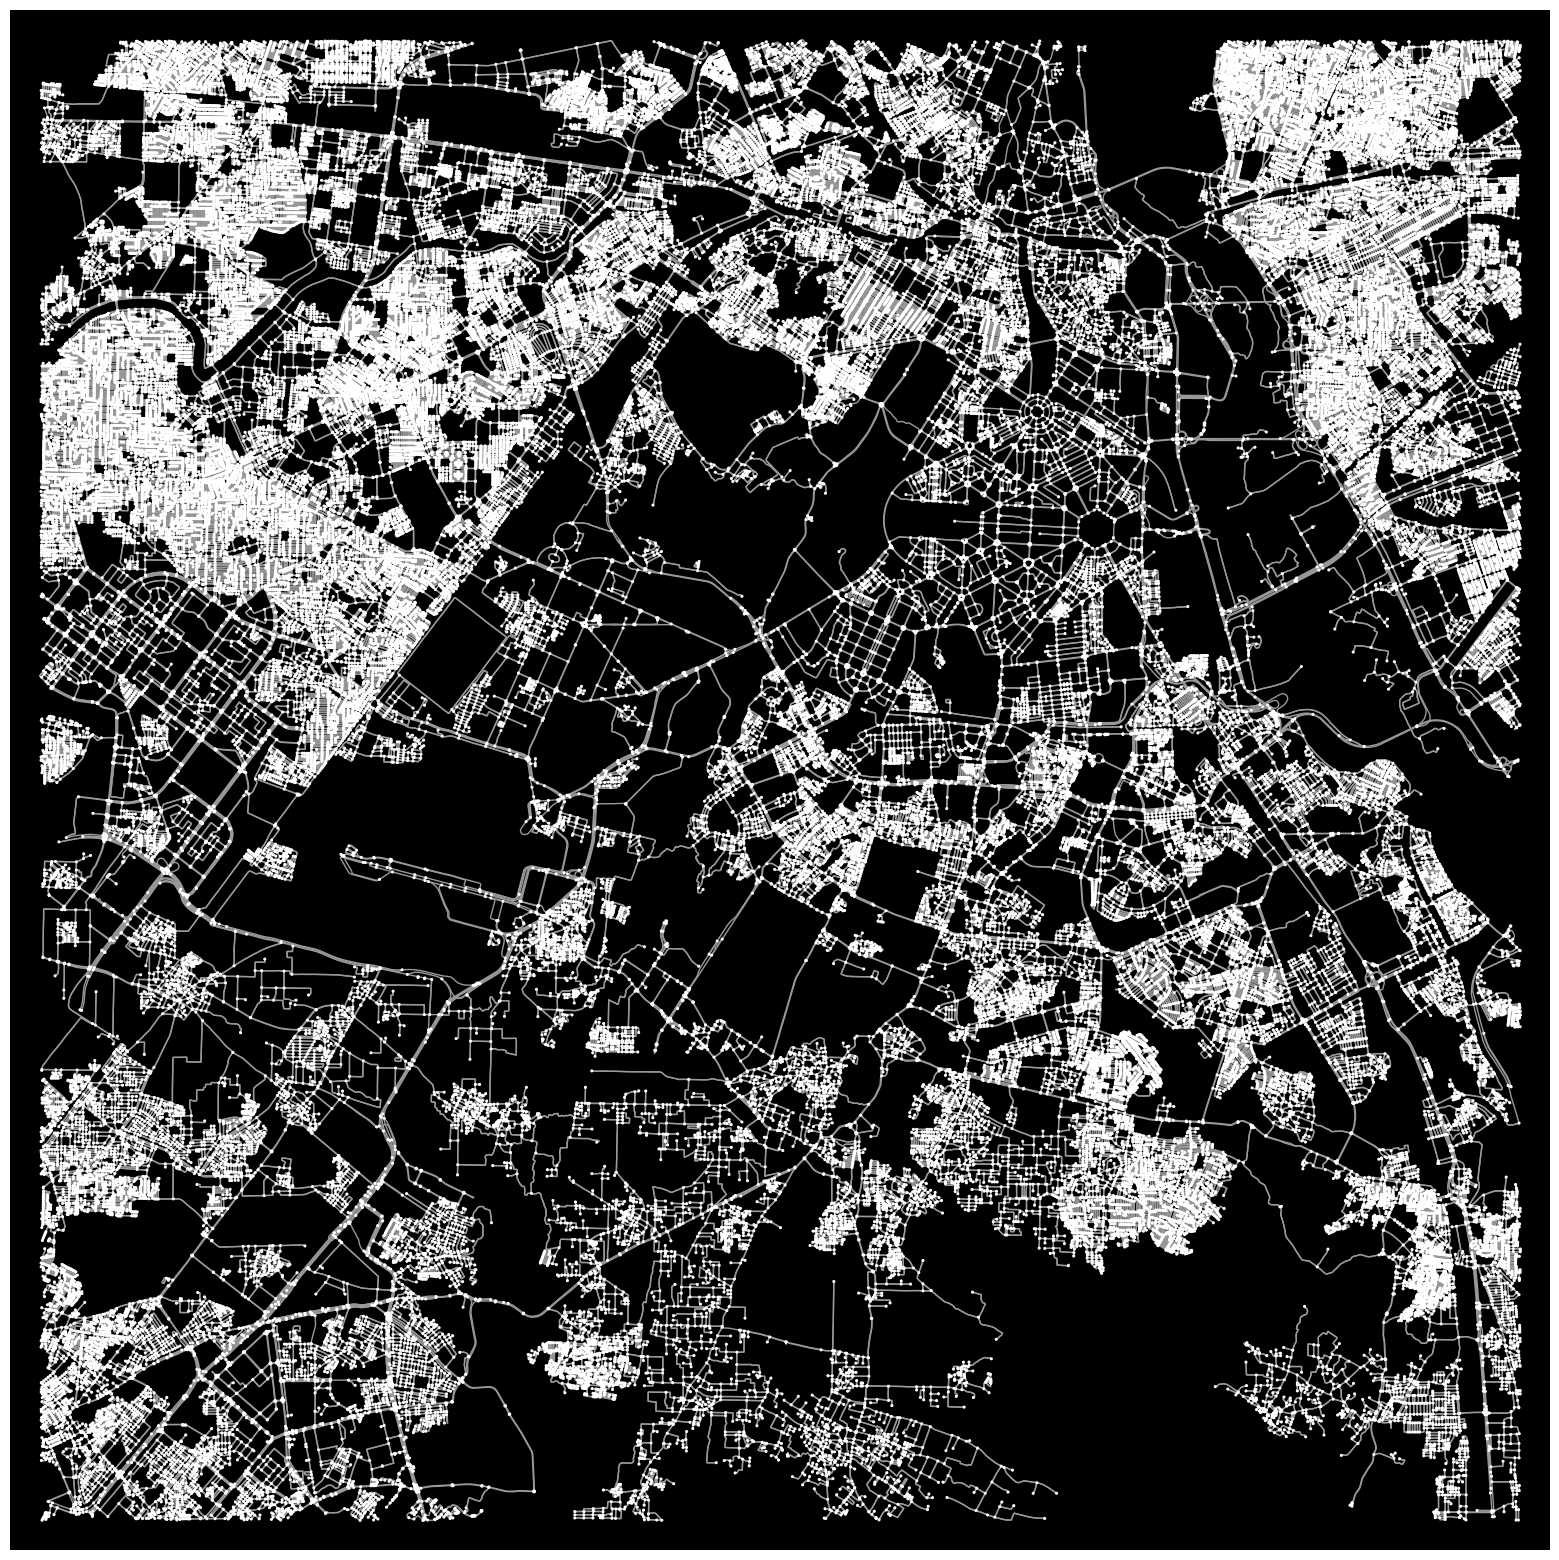

In [9]:
G=ox.graph_from_point(start, dist = 14000, network_type="drive")
G=ox.add_edge_speeds(G)
G=ox.add_edge_travel_times(G)
fig,ax = ox.plot_graph(G, bgcolor="black", node_size=5, node_color="white", figsize=(20, 20))

In [10]:
start_node = ox.distance.nearest_nodes(G, start[1], start[0])
print("nodes: from ", start_node)

nodes: from  5464573100


In [11]:
df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
df = df.drop_duplicates("node", keep="first")
df.head()

C:\Users\s.sen\AppData\Local\Temp\ipykernel_12960\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\s.sen\AppData\Local\Temp\ipykernel_12960\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\s.sen\AppData\Local\Temp\ipykernel_12960\3568422065.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

id       City                                     Street Address      y  \
0   0  New Delhi  Sangam Courtyard, Major Somnath Marg, Sector 9...  28.57   
1   1  New Delhi                    Domestic Departure, Terminal 1D  28.56   
2   2  New Delhi          Ground Floor, Pacific Mall, Subhash Nagar  28.64   
3   3  New Delhi      1st Floor, Ambience Mall, Nelson Mandela Marg  28.54   
4   4  New Delhi                Ground Floor, Select City Walk Mall  28.53   

       x        node  
0  77.17  5464573100  
1  77.12  6541979906  
2  77.11  9699816496  
3  77.16  2009014674  
4  77.22  6438793178

In [12]:
df

id       City                                     Street Address      y  \
0    0  New Delhi  Sangam Courtyard, Major Somnath Marg, Sector 9...  28.57   
1    1  New Delhi                    Domestic Departure, Terminal 1D  28.56   
2    2  New Delhi          Ground Floor, Pacific Mall, Subhash Nagar  28.64   
3    3  New Delhi      1st Floor, Ambience Mall, Nelson Mandela Marg  28.54   
4    4  New Delhi                Ground Floor, Select City Walk Mall  28.53   
5    5  New Delhi      Lower Ground Floor, Nehru Place Metro Station  28.55   
6    6  New Delhi              Hamilton House, A Block, Inner Circle  28.63   
9    9  New Delhi  Ground Floor, HB Twin Towers, Netaji Subhash P...  28.69   
10  10  New Delhi                  M Block Market, Greater Kailash 1  28.55   
11  11  New Delhi  International Departure, Near Gate 15, Termina...  28.56   
13  13  New Delhi  Ground Floor, Power House, Hauz Khas Village, ...  28.55   
14  14  New Delhi  Ground Floor, M-11, M-Block, Main Mrkt, Greate...  28.53   
15  15  New Delhi               First Floor, Spark Mall, Kamla Nagar  28.68   

        x        node  
0   77.17  5464573100  
1   77.12  6541979906  
2   77.11  9699816496  
3   77.16  2009014674  
4   77.22  6438793178  
5   77.25   910665179  
6   77.22  5681450581  
9   77.15  1826038884  
10  77.24   939270551  
11  77.10  4230117891  
13  77.19   560224224  
14  77.24  7640317808  
15  77.20  1411138852

In [13]:
def f(a, b):
    try:
        d = nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

In [14]:
distance_matrix = np.asarray([[f(a, b) for b in df["node"].tolist()] for a in df["node"].tolist()])
distance_matrix = pd.DataFrame(distance_matrix, columns=df["node"].values, index=df["node"].values)
distance_matrix

5464573100   6541979906   9699816496   2009014674   6438793178  \
5464573100     0.000000   499.597061  1045.350892   377.382304   717.708568   
6541979906   603.465247     0.000000  1165.253224   809.334620  1195.467929   
9699816496  1050.304200  1228.962364     0.000000  1397.638395  1684.448389   
2009014674   566.225924   810.514351  1525.299206     0.000000   830.088526   
6438793178   743.986145  1063.416597  1683.235124   718.665274     0.000000   
910665179    798.723972  1225.039638  1672.351967   929.121107   432.982938   
5681450581   770.178555   981.217995  1035.979785  1116.093576  1025.810312   
1826038884  1416.182571  1609.934898   690.493037  1763.516766  1980.447991   
939270551    783.122165  1239.647093  1656.750160   969.264994   498.167594   
4230117891   790.805135   512.453339  1424.671678   642.254715  1254.118858   
560224224    345.536473   664.966925  1284.785452   369.048394   462.834448   
7640317808   994.789357  1314.219809  1934.038336  1018.301278   522.163108   
1411138852  1271.900979  1452.363199   914.255206  1619.235174  1647.889417   

             910665179    5681450581   1826038884   939270551    4230117891  \
5464573100   879.824901   783.013111  1385.251693   885.163597   775.713427   
6541979906  1361.081043  1263.389031  1564.016979  1396.781240   732.304365   
9699816496  1684.412843  1091.260668   664.659138  1689.751540  1505.078729   
2009014674  1066.564621  1262.961425  1865.200007  1102.264818   723.529494   
6438793178   364.883872  1024.070559  1942.064230   400.584069  1339.532962   
910665179      0.000000   855.932294  1848.399987   116.398840  1501.156004   
5681450581   899.446260     0.000000  1035.783311   904.784956  1257.334361   
1826038884  1895.983395  1091.691264     0.000000  1901.322091  1886.051263   
939270551    141.829535   840.330487  1832.798180     0.000000  1515.763458   
4230117891  1548.420932  1450.728920  1823.763015  1584.121129     0.000000   
560224224    626.333437   931.854081  1624.686253   662.033634   941.083290   
7640317808   315.184408  1146.246562  2138.714256   378.774128  1590.336174   
1411138852  1470.189727   622.079105   664.129958  1475.528423  1728.479564   

             560224224    7640317808   1411138852  
5464573100   543.504874   935.995131  1183.390490  
6541979906  1021.264234  1413.754492  1507.278353  
9699816496  1508.130569  1900.620826   946.352441  
2009014674   726.747812  1119.238069  1663.338804  
6438793178   398.449672   417.557320  1542.390955  
910665179    560.072713   292.560136  1374.252691  
5681450581   869.940643  1151.300331   518.320397  
1826038884  1824.578322  2147.837466   682.582210  
939270551    600.216601   415.141314  1358.650884  
4230117891  1208.604123  1601.094380  1694.618242  
560224224      0.000000   679.006886  1403.384347  
7640317808   649.252884     0.000000  1664.566959  
1411138852  1492.019748  1722.043799     0.000000

In [15]:
distance_matrix.shape

(13, 13)

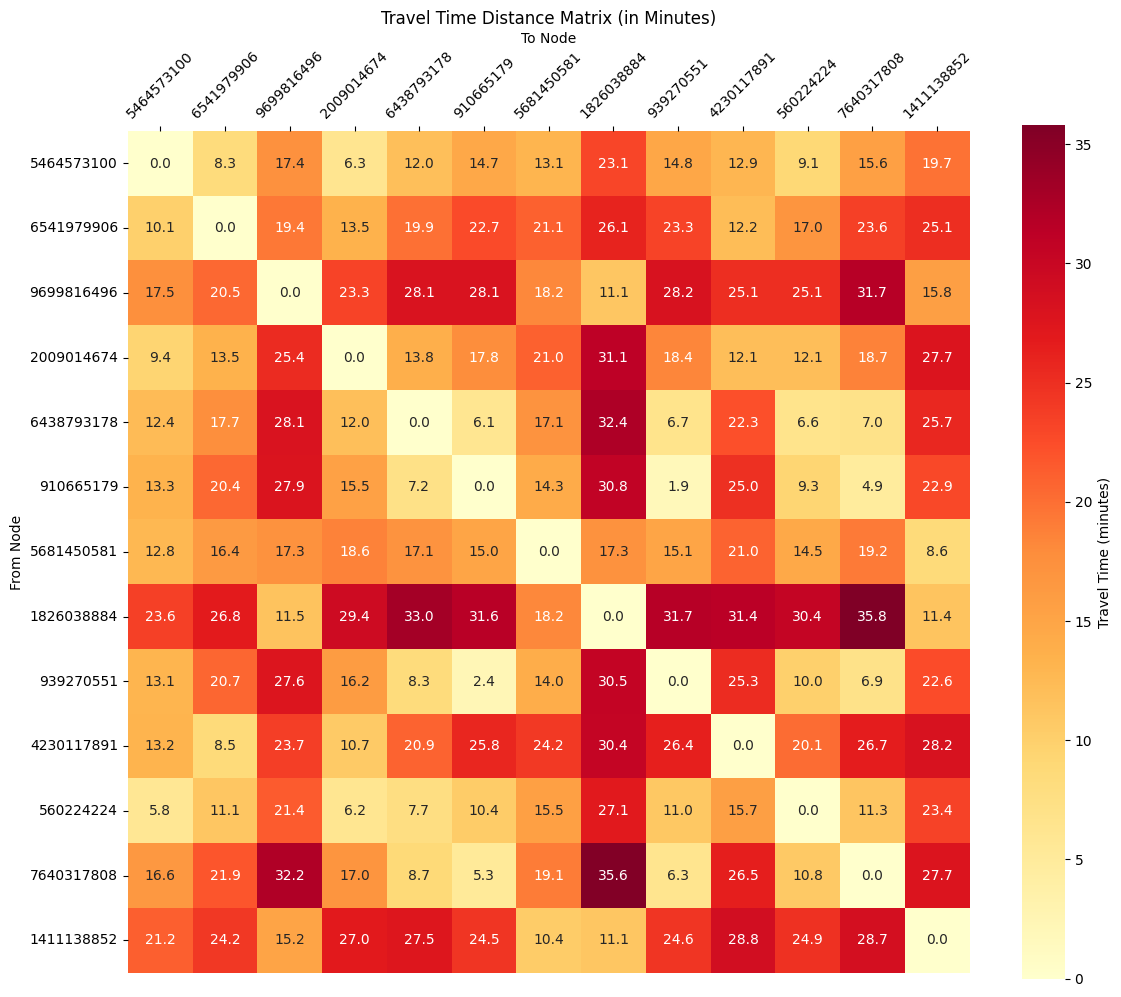

In [16]:
heatmap = distance_matrix.copy()
heatmap = heatmap/60;
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(heatmap, 
            annot=True,
            fmt=".1f",
            cmap="YlOrRd", 
            square=True, 
            cbar_kws={'label': 'Travel Time (minutes)'})
plt.title("Travel Time Distance Matrix (in Minutes)")
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.xlabel("To Node")
plt.ylabel("From Node")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
distance_matrix = distance_matrix.round().astype('int')
distance_matrix

5464573100  6541979906  9699816496  2009014674  6438793178  \
5464573100           0         500        1045         377         718   
6541979906         603           0        1165         809        1195   
9699816496        1050        1229           0        1398        1684   
2009014674         566         811        1525           0         830   
6438793178         744        1063        1683         719           0   
910665179          799        1225        1672         929         433   
5681450581         770         981        1036        1116        1026   
1826038884        1416        1610         690        1764        1980   
939270551          783        1240        1657         969         498   
4230117891         791         512        1425         642        1254   
560224224          346         665        1285         369         463   
7640317808         995        1314        1934        1018         522   
1411138852        1272        1452         914        1619        1648   

            910665179   5681450581  1826038884  939270551   4230117891  \
5464573100         880         783        1385         885         776   
6541979906        1361        1263        1564        1397         732   
9699816496        1684        1091         665        1690        1505   
2009014674        1067        1263        1865        1102         724   
6438793178         365        1024        1942         401        1340   
910665179            0         856        1848         116        1501   
5681450581         899           0        1036         905        1257   
1826038884        1896        1092           0        1901        1886   
939270551          142         840        1833           0        1516   
4230117891        1548        1451        1824        1584           0   
560224224          626         932        1625         662         941   
7640317808         315        1146        2139         379        1590   
1411138852        1470         622         664        1476        1728   

            560224224   7640317808  1411138852  
5464573100         544         936        1183  
6541979906        1021        1414        1507  
9699816496        1508        1901         946  
2009014674         727        1119        1663  
6438793178         398         418        1542  
910665179          560         293        1374  
5681450581         870        1151         518  
1826038884        1825        2148         683  
939270551          600         415        1359  
4230117891        1209        1601        1695  
560224224            0         679        1403  
7640317808         649           0        1665  
1411138852        1492        1722           0

In [18]:
drivers = 1
nodes_to_visit = df["node"].tolist()
print(f"Total locations to visit = {len(nodes_to_visit)-1} from the start node {start_node} with {drivers} driver(s)")

Total locations to visit = 12 from the start node 5464573100 with 1 driver(s)


In [19]:
manager= pywrapcp.RoutingIndexManager(len(nodes_to_visit), drivers, nodes_to_visit.index(start_node))
model=pywrapcp.RoutingModel(manager)

In [20]:
def get_distance(from_index, to_index):
    return distance_matrix.iloc[from_index, to_index]

distance=model.RegisterTransitCallback(get_distance)
model.SetArcCostEvaluatorOfAllVehicles(distance)

parameters = pywrapcp.DefaultRoutingSearchParameters()
parameters.first_solution_strategy= (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [21]:
solution= model.SolveWithParameters(parameters)

index=model.Start(0)
print('route for driver:')
route_idx, route_distance = [], 0

while not model.IsEnd(index):
    route_idx.append(manager.IndexToNode(index))
    previous_index=index
    index=solution.Value(model.NextVar(index))
    
    try:
        route_distance +=get_distance(previous_index, index)
    except:
        route_distance+=model.GetArcCostForVehicle(from_index=previous_index, to_index=index, vehicle=0)
        
print(route_idx)
print(f'Total distance:{round(route_distance/60,2)}minutes')
print(f'Nodes visited: {len(route_idx)}')

route for driver:
[0, 9, 3, 1, 10, 4, 5, 8, 11, 6, 12, 7, 2]
Total distance:127.12minutes
Nodes visited: 13


In [22]:
print("Route for driver (nodes):")
lst_route=[nodes_to_visit[i] for i in route_idx]
print(lst_route)

Route for driver (nodes):
[5464573100, 4230117891, 2009014674, 6541979906, 560224224, 6438793178, 910665179, 939270551, 7640317808, 5681450581, 1411138852, 1826038884, 9699816496]


In [23]:
import geopandas as gpd
# === Step 1: Get route paths from optimized node list ===

def get_path_between_nodes(lst_route):
    lst_paths = []
    for i in range(len(lst_route) - 1):
        a, b = lst_route[i], lst_route[i + 1]
        try:
            path = nx.shortest_path(G, source=a, target=b, method='dijkstra', weight='travel_time')
            if len(path) > 1:
                lst_paths.append(path)
        except:
            continue
    return lst_paths

lst_paths = get_path_between_nodes(lst_route)

# === Step 2: Extract edge geometries for all paths ===
from osmnx import graph_to_gdfs
# Create a GeoDataFrame to collect all edge segments used in paths
gdf_list = []

for path in lst_paths:
    edges = graph_to_gdfs(G.subgraph(path), nodes=False)
    gdf_list.append(edges)

route_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

route_gdf.explore(
    color="blue",
    style_kwds={"weight": 4, "opacity": 0.7},
    tooltip="length"
)

In [36]:
def df_animation_multiple_path(G, lst_paths, parallel=True):
    df = pd.DataFrame()
    
    for path in lst_paths:
        lst_start, lst_end = [], []
        start_x, start_y = [], []
        end_x, end_y = [], []
        lst_length, lst_time = [], []
        
        for a, b in zip(path[:-1], path[1:]):
            lst_start.append(a)
            lst_end.append(b)
            start_x.append(G.nodes[a]['x'])
            start_y.append(G.nodes[a]['y'])
            end_x.append(G.nodes[b]['x'])
            end_y.append(G.nodes[b]['y'])
            lst_length.append(round(G.edges[a, b, 0]['length']))
            lst_time.append(round(G.edges[a, b, 0]['travel_time']))
        
        tmp = pd.DataFrame(list(zip(
            lst_start, lst_end,
            start_x, start_y,
            end_x, end_y,
            lst_length, lst_time
        )), columns=[
            "start", "end",
            "start_x", "start_y",
            "end_x", "end_y",
            "length", "travel_time"
        ])
        
        df = pd.concat([df, tmp], ignore_index=(not parallel))
    
    df = df.reset_index().rename(columns={"index": "id"})
    return df


In [37]:
df_route_segments = pd.DataFrame()

# Extract segment-wise route data
tmp = df_animation_multiple_path(G, lst_paths, parallel=False)

# Append to main DataFrame
df_route_segments = pd.concat([df_route_segments, tmp], axis=0)

# Start and end nodes
first_node = lst_paths[0][0]
last_node = lst_paths[-1][-1]


In [38]:
import nbformat
print(nbformat.__version__)

5.10.4


In [39]:
# Start and end node filters
df_start = df_route_segments[df_route_segments["start"] == first_node]
df_end   = df_route_segments[df_route_segments["end"] == last_node]

fig = px.scatter_map(
    data_frame=df_route_segments,
    lon="start_x",
    lat="start_y",
    zoom=15,
    width=900,
    height=700,
    animation_frame="id"
)

# Set basemap style here
fig.update_layout(mapbox_style="carto-positron")

# Moving points
fig.data[0].marker = {"size": 12}

# Original store locations
fig.add_trace(px.scatter_map(data_frame=df, lon="x", lat="y").data[0])
fig.data[1].marker = {"size": 10, "color": "black"}

# Start node (red)
fig.add_trace(px.scatter_map(data_frame=df_start, lon="start_x", lat="start_y").data[0])
fig.data[2].marker = {"size": 15, "color": "red"}

# End node (green)
fig.add_trace(px.scatter_map(data_frame=df_end, lon="end_x", lat="end_y").data[0])
fig.data[3].marker = {"size": 15, "color": "green"}

# Route path
fig.add_trace(px.line_map(data_frame=df_route_segments, lon="start_x", lat="start_y").data[0])

# fig.write_html("./simulations/animated_route.html")

# Show the animation
fig.show()


In [40]:
fig.write_html("animated_route.html")